In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re

In [3]:
loan_data = pd.read_csv("loan_data_2007_2014.csv")

In [4]:
loan_data.shape

(466285, 75)

In [5]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## MAKING THE TARGET VARIABLE 

In [6]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [7]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']),0,1)

In [8]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

In [9]:
loan_data = loan_data.drop('loan_status',axis=1)

## TRAIN TEST SPLIT 

In [10]:
loan_data = loan_data.sample(frac=1).reset_index(drop=True)

In [11]:
loan_data.shape

(466285, 75)

In [12]:
train_loan_data = loan_data.iloc[:400000,:].copy()
test_loan_data = loan_data.iloc[400000:,:].copy()

In [13]:
train_loan_data.shape

(400000, 75)

In [14]:
test_loan_data.shape

(66285, 75)

## CLEANING AND PREPROCESSING 

In [15]:
train_loan_data['good_bad'].value_counts()

1    356174
0     43826
Name: good_bad, dtype: int64

In [16]:
train_loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,good_bad
0,184838,2088833,2421285,28200,28200,28200.0,60 months,21.98,778.54,E,E4,Philips Medical,< 1 year,OWN,99000.0,Verified,Nov-12,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt Consolidation,136xx,NY,24.42,0.0,Oct-03,1.0,NaN,NaN,12.0,0.0,11637,83.7,16.0,f,0.00,0.00,17325.67,17325.67,5527.05,8485.83,0.0,3312.79,33.1279,Jun-14,778.54,NaN,Oct-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,84007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13900.0,NaN,NaN,NaN,0
1,338001,22332658,24655521,8000,8000,8000.0,36 months,22.15,306.15,E,E5,officeclerk,8 years,RENT,53000.0,Verified,Jul-14,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,902xx,CA,29.66,0.0,Aug-07,0.0,NaN,NaN,19.0,0.0,20225,87.2,21.0,w,4868.73,4868.73,5204.55,5204.55,3131.27,2073.28,0.0,0.00,0.0000,Dec-15,306.15,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,35282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23200.0,NaN,NaN,NaN,1
2,108353,6538476,8090608,8000,8000,8000.0,36 months,19.52,295.36,D,D4,first student,4 years,MORTGAGE,33000.0,Not Verified,Aug-13,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,out of debt,618xx,IL,23.56,0.0,Aug-98,1.0,27.0,97.0,9.0,1.0,6077,61.4,30.0,w,2952.83,2952.83,7384.00,7384.00,5047.17,2336.83,0.0,0.00,0.0000,Sep-15,295.36,Feb-16,Jan-16,0.0,60.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,501.0,11342.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9900.0,NaN,NaN,NaN,0
3,227100,1128872,1367380,10000,10000,10000.0,36 months,9.91,322.25,B,B1,Allen Independent School District,3 years,RENT,47000.0,Source Verified,Feb-12,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit Card Debt,750xx,TX,14.68,0.0,Mar-03,1.0,NaN,NaN,9.0,0.0,13503,54.4,21.0,f,0.00,0.00,10967.10,10967.10,10000.00,967.10,0.0,0.00,0.0000,Apr-13,6795.73,NaN,Feb-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,9385,850364,1062181,9600,9600,9350.0,36 months,10.99,314.25,B,B3,NGP VAN,2 years,RENT,85000.0,Not Verified,Aug-11,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 08/13/11 > I recently got ...,wedding,Engagement Ring for a Wonderful Woman,200xx,DC,10.04,0.0,Aug-89,0.0,NaN,NaN,5.0,0.0,19699,95.6,7.0,f,0.00,0.00,10891.93,10608.16,9600.00,1291.93,0.0,0.00,0.0000,Mar-13,5264.37,NaN,Mar-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [17]:
train_loan_data.isna().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       23683
emp_length                      17989
home_ownership                      0
annual_inc                          1
verification_status                 0
issue_d                             0
pymnt_plan                          0
url                                 0
desc                           291950
purpose                             0
title                              16
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        19
earliest_cr_

In [18]:
train_loan_data['term'] = train_loan_data['term'].apply(lambda x: re.search(r'\d+', x)[0])

In [19]:
train_loan_data['emp_length'] = np.where(train_loan_data['emp_length'].isna(),'0',train_loan_data['emp_length'])
train_loan_data['emp_length'] = np.where(train_loan_data['emp_length']=='< 1 year','0',train_loan_data['emp_length'])
train_loan_data['emp_length'] = train_loan_data['emp_length'].apply(lambda x: re.search(r'\d+',x)[0])

In [20]:
train_loan_data['issue_d'] = pd.to_datetime(train_loan_data['issue_d'],format='%b-%y')
train_loan_data['months_since_issue_d'] = round((pd.to_datetime('2017-12-01') - train_loan_data['issue_d'])/np.timedelta64(1,'M'),0)

In [21]:
train_loan_data['earliest_cr_line'] = pd.to_datetime(train_loan_data['earliest_cr_line'],format='%b-%y')
train_loan_data['months_since_ear_cr_line'] = round((pd.to_datetime('2017-12-01') - train_loan_data['earliest_cr_line'])/np.timedelta64(1,'M'),0)

## Preprocessing discrete data 

In [22]:
def woe_discrete(df,indep_var,dep_var):
    df = df[[indep_var,dep_var]]
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [indep_var,'n_obs','prop_good']
    df['prop_bad'] = 1 - df['prop_good']
    df['n_obs_good'] = df['n_obs'] * df ['prop_good']
    df['n_obs_bad'] = df['n_obs'] * df['prop_bad']
    df['woe'] = np.log(df['n_obs_good']/df['n_obs_bad'])
    df = df.sort_values('woe').reset_index(drop=True)
    df['IV'] = (df['prop_good'] - df['prop_bad']) * df['woe']
    df['IV'] = df['IV'].sum()
    
    return df

In [23]:
def plot_woe(df):
    plt.figure(figsize=(18,8))
    plt.plot(df.iloc[:,0],df.loc[:,'woe'],marker='o')
    plt.xlabel(df.columns.values[0])
    plt.ylabel('WOE')
    plt.title('WOE by '+str(df.columns.values[0]))

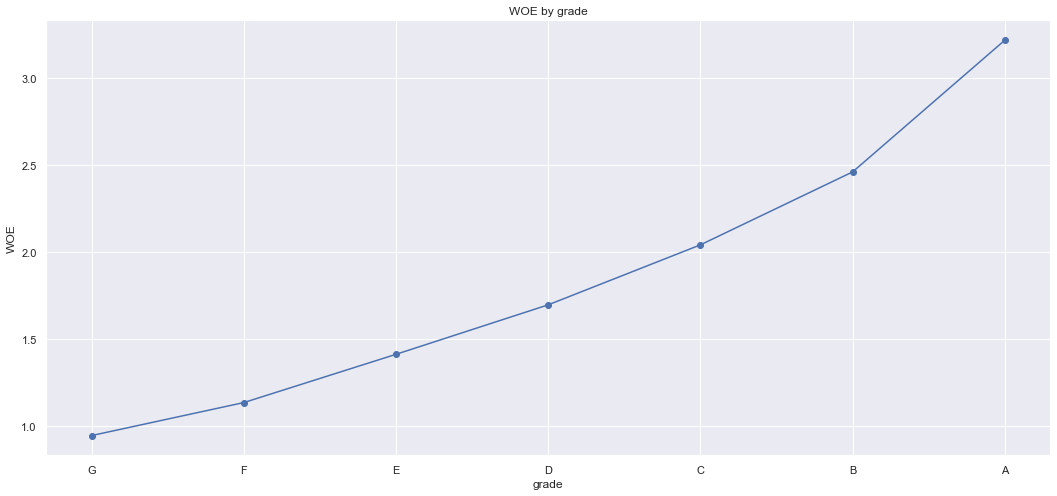

In [24]:
plot_woe(woe_discrete(train_loan_data,'grade','good_bad'))

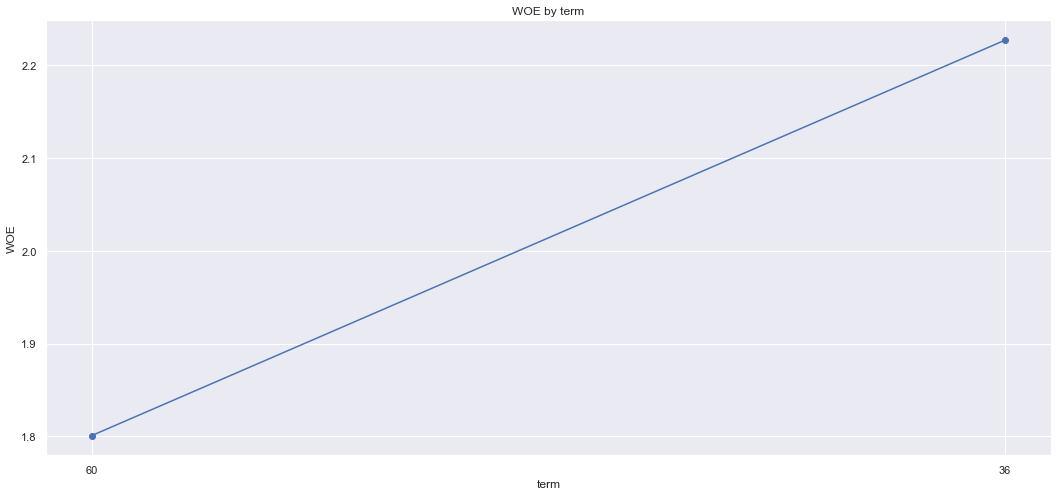

In [25]:
plot_woe(woe_discrete(train_loan_data,'term','good_bad'))

In [26]:
pd.get_dummies(train_loan_data[['addr_state']],prefix='addr_state',prefix_sep=':').columns

Index(['addr_state:AK', 'addr_state:AL', 'addr_state:AR', 'addr_state:AZ',
       'addr_state:CA', 'addr_state:CO', 'addr_state:CT', 'addr_state:DC',
       'addr_state:DE', 'addr_state:FL', 'addr_state:GA', 'addr_state:HI',
       'addr_state:IA', 'addr_state:ID', 'addr_state:IL', 'addr_state:IN',
       'addr_state:KS', 'addr_state:KY', 'addr_state:LA', 'addr_state:MA',
       'addr_state:MD', 'addr_state:ME', 'addr_state:MI', 'addr_state:MN',
       'addr_state:MO', 'addr_state:MS', 'addr_state:MT', 'addr_state:NC',
       'addr_state:NE', 'addr_state:NH', 'addr_state:NJ', 'addr_state:NM',
       'addr_state:NV', 'addr_state:NY', 'addr_state:OH', 'addr_state:OK',
       'addr_state:OR', 'addr_state:PA', 'addr_state:RI', 'addr_state:SC',
       'addr_state:SD', 'addr_state:TN', 'addr_state:TX', 'addr_state:UT',
       'addr_state:VA', 'addr_state:VT', 'addr_state:WA', 'addr_state:WI',
       'addr_state:WV', 'addr_state:WY'],
      dtype='object')

In [27]:
woe_discrete(train_loan_data,'home_ownership','good_bad')

,home_ownership,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,OTHER,158,0.791139,0.208861,125.0,33.0,1.331806,inf
1,NONE,43,0.837209,0.162791,36.0,7.0,1.637609,inf
2,RENT,161638,0.873910,0.126090,141257.0,20381.0,1.935978,inf
3,OWN,35748,0.891071,0.108929,31854.0,3894.0,2.101726,inf
4,MORTGAGE,202412,0.903607,0.096393,182901.0,19511.0,2.237967,inf
5,ANY,1,1.000000,0.000000,1.0,0.0,inf,inf


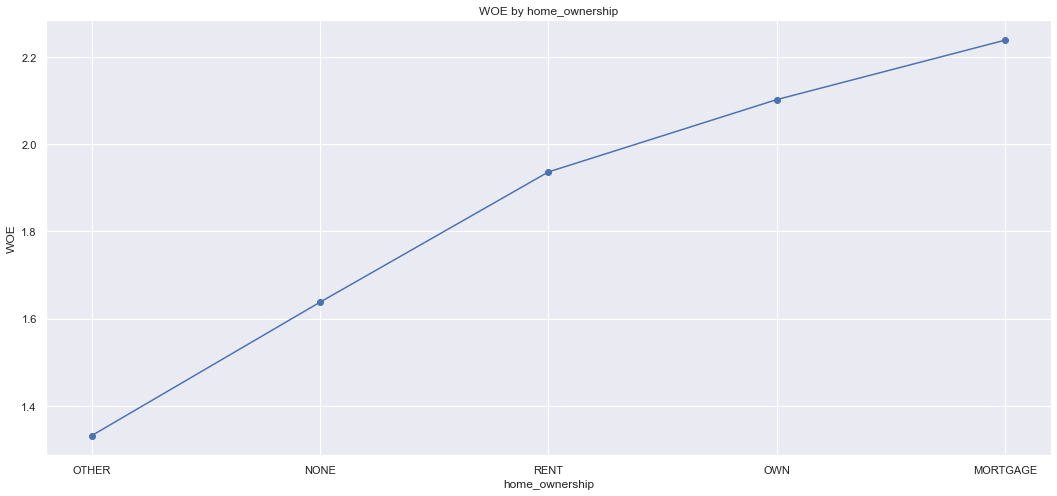

In [28]:
plot_woe(woe_discrete(train_loan_data,'home_ownership','good_bad'))

In [29]:
woe_discrete(train_loan_data,'verification_status','good_bad')

,verification_status,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,Verified,144137,0.872392,0.127608,125744.0,18393.0,1.922278,4.967405
1,Source Verified,128900,0.895593,0.104407,115442.0,13458.0,2.149195,4.967405
2,Not Verified,126963,0.905681,0.094319,114988.0,11975.0,2.262007,4.967405


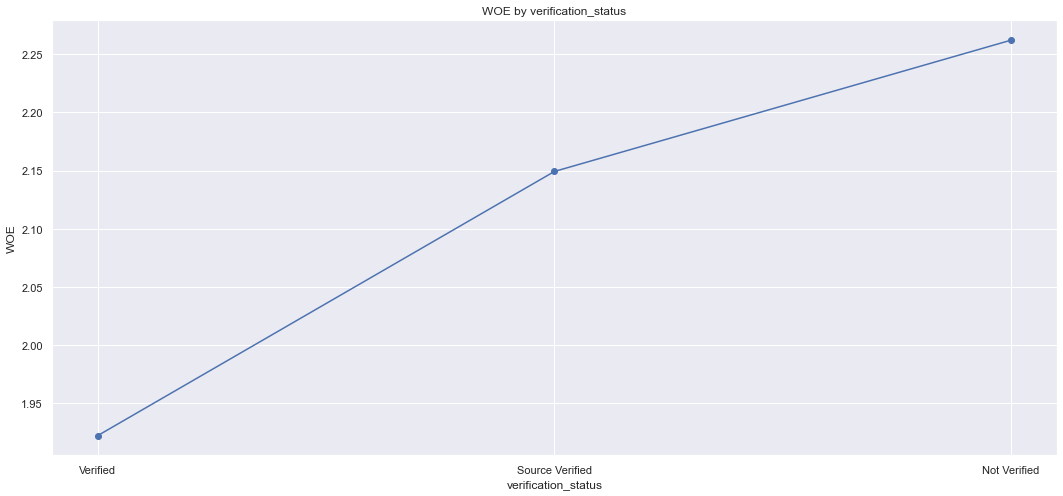

In [30]:
plot_woe(woe_discrete(train_loan_data,'verification_status','good_bad'))

In [31]:
woe_discrete(train_loan_data,'purpose','good_bad')

,purpose,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,small_business,6032,0.782825,0.217175,4722.0,1310.0,1.282205,19.905876
1,educational,371,0.792453,0.207547,294.0,77.0,1.339774,19.905876
2,renewable_energy,297,0.845118,0.154882,251.0,46.0,1.696812,19.905876
3,moving,2587,0.846154,0.153846,2189.0,398.0,1.704748,19.905876
4,other,20252,0.861989,0.138011,17457.0,2795.0,1.831909,19.905876
5,house,1943,0.862069,0.137931,1675.0,268.0,1.832581,19.905876
6,medical,3927,0.865292,0.134708,3398.0,529.0,1.859954,19.905876
7,wedding,2022,0.880811,0.119189,1781.0,241.0,2.000133,19.905876
8,vacation,2123,0.881300,0.118700,1871.0,252.0,2.004799,19.905876
9,debt_consolidation,235330,0.886389,0.113611,208594.0,26736.0,2.054379,19.905876


In [32]:
woe_discrete(train_loan_data,'initial_list_status','good_bad')

,initial_list_status,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,f,259994,0.879482,0.120518,228660.0,31334.0,1.987532,3.41704
1,w,140006,0.910775,0.089225,127514.0,12492.0,2.323138,3.41704


In [33]:
woe_discrete(train_loan_data,'addr_state','good_bad')

,addr_state,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,NE,12,0.500000,0.500000,6.0,6.0,0.000000,inf
1,IA,11,0.818182,0.181818,9.0,2.0,1.504077,inf
2,NV,5588,0.863636,0.136364,4826.0,762.0,1.845827,inf
3,FL,27199,0.873562,0.126438,23760.0,3439.0,1.932823,inf
4,HI,2145,0.874126,0.125874,1875.0,270.0,1.937942,inf
5,AL,5017,0.877018,0.122982,4400.0,617.0,1.964491,inf
6,NM,2251,0.880053,0.119947,1981.0,270.0,1.992935,inf
7,LA,4735,0.882577,0.117423,4179.0,556.0,2.017059,inf
8,NY,34392,0.882996,0.117004,30368.0,4024.0,2.021113,inf
9,MD,9432,0.884118,0.115882,8339.0,1093.0,2.032017,inf


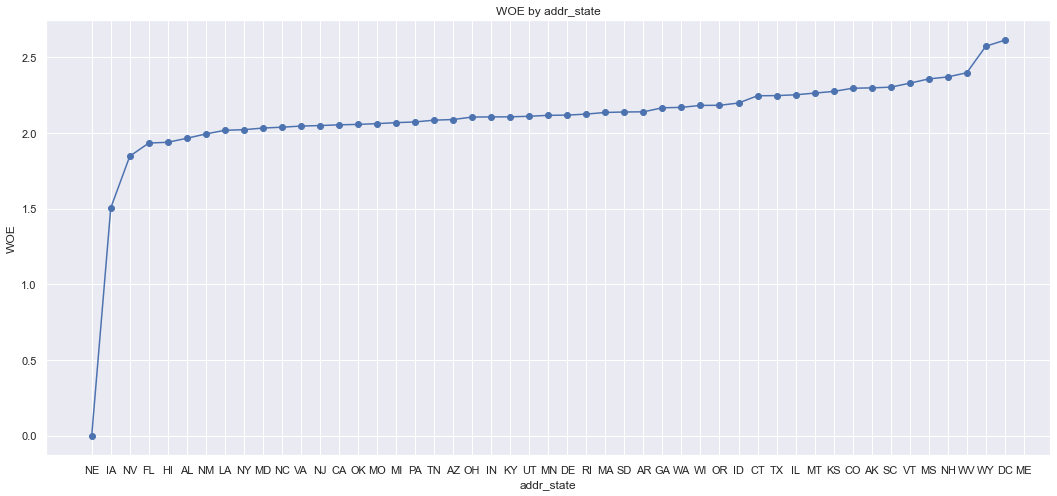

In [34]:
plot_woe(woe_discrete(train_loan_data,'addr_state','good_bad'))

In [35]:
woe_discrete(train_loan_data,'addr_state','good_bad').iloc[2:42,:]

,addr_state,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
2,NV,5588,0.863636,0.136364,4826.0,762.0,1.845827,inf
3,FL,27199,0.873562,0.126438,23760.0,3439.0,1.932823,inf
4,HI,2145,0.874126,0.125874,1875.0,270.0,1.937942,inf
5,AL,5017,0.877018,0.122982,4400.0,617.0,1.964491,inf
6,NM,2251,0.880053,0.119947,1981.0,270.0,1.992935,inf
7,LA,4735,0.882577,0.117423,4179.0,556.0,2.017059,inf
8,NY,34392,0.882996,0.117004,30368.0,4024.0,2.021113,inf
9,MD,9432,0.884118,0.115882,8339.0,1093.0,2.032017,inf
10,NC,10908,0.884672,0.115328,9650.0,1258.0,2.037435,inf
11,VA,12204,0.885447,0.114553,10806.0,1398.0,2.045059,inf


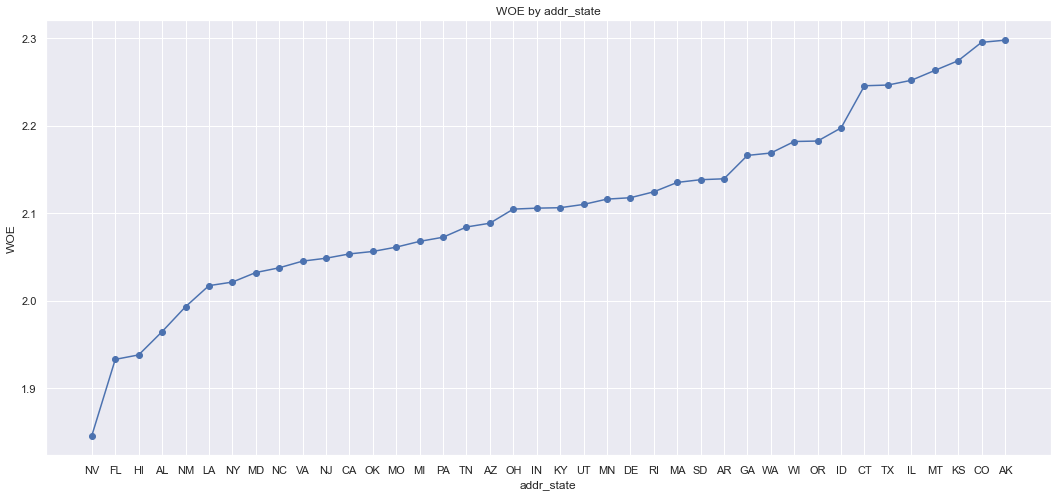

In [36]:
plot_woe(woe_discrete(train_loan_data,'addr_state','good_bad').iloc[2:42,:])

NE, IA,NV into one<br>
KS, MS, NH, VT, WV,DC,WY,ME into one<br>
FL separate<br>
AL,HI,LA,NM into one <br>
NY separate<br>
NC,MD,OK into one<br>
CA separate<br>
VA,NJ,MO,TN,UT,AZ,AR,DE,RI,KY,MI into one<br>
OH,PA,MA,MN,IN,GA,WI,SD,WA,OR,MT into one <br>
TX separate<br>
IL,SC,CT,AK,CO,ID into one<br>

In [37]:
grade_df = pd.get_dummies(train_loan_data['grade'],prefix='grade',prefix_sep=':')
grade_df = grade_df.drop('grade:G',axis=1)

In [38]:
term_df = pd.get_dummies(train_loan_data['term'],prefix='term',prefix_sep=':')
term_df = term_df.drop('term:60',axis=1)

In [39]:
home_ownership_df = pd.get_dummies(train_loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':')
home_ownership_df['home_ownership:RENT_ANY_OTHER_NONE'] = home_ownership_df['home_ownership:RENT'] + \
                                                          home_ownership_df['home_ownership:ANY'] + \
                                                          home_ownership_df['home_ownership:OTHER'] + \
                                                          home_ownership_df['home_ownership:NONE']
home_ownership_df = home_ownership_df.drop(['home_ownership:RENT_ANY_OTHER_NONE','home_ownership:RENT','home_ownership:ANY','home_ownership:NONE','home_ownership:OTHER'],axis=1)

In [40]:
verification_status_df = pd.get_dummies(train_loan_data['verification_status'],prefix='verification_status',prefix_sep=':')
verification_status_df = verification_status_df.drop('verification_status:Verified',axis=1)

NE, IA,NV into one<br>
KS, MS, NH, VT, WV,DC,WY,ME into one<br>
FL separate<br>
AL,HI,LA,NM into one <br>
NY separate<br>
NC,MD,OK into one<br>
CA separate<br>
VA,NJ,MO,TN,UT,AZ,AR,DE,RI,KY,MI into one<br>
OH,PA,MA,MN,IN,GA,WI,SD,WA,OR,MT into one <br>
TX separate<br>
IL,SC,CT,AK,CO,ID into one<br>

In [41]:
addr_state_df = pd.get_dummies(train_loan_data['addr_state'],prefix='addr_state',prefix_sep=':')
addr_state_df['addr_state:NE_IA_NV'] = addr_state_df['addr_state:NE'] + addr_state_df['addr_state:IA']+addr_state_df['addr_state:NV'] 
addr_state_df['addr_state:KS_MS_NH_VT_WV_DC_WY_ME'] = addr_state_df['addr_state:KS'] + \
                                                    addr_state_df['addr_state:MS'] + \
                                                    addr_state_df['addr_state:NH'] + \
                                                    addr_state_df['addr_state:VT'] + \
                                                    addr_state_df['addr_state:WV'] + \
                                                    addr_state_df['addr_state:DC'] + \
                                                    addr_state_df['addr_state:WY'] + \
                                                    addr_state_df['addr_state:ME']
addr_state_df['addr_state:AL_HI_LA_NM'] = addr_state_df['addr_state:AL'] + \
                                        addr_state_df['addr_state:HI'] + \
                                        addr_state_df['addr_state:LA'] + \
                                        addr_state_df['addr_state:NM']
addr_state_df['addr_state:NC_MD_OK'] = addr_state_df['addr_state:NC'] + \
                                    addr_state_df['addr_state:MD'] + \
                                    addr_state_df['addr_state:OK']
addr_state_df['addr_state:VA_NJ_MO_TN_UT_AZ_AR_DE_RI_KY_MI'] = addr_state_df['addr_state:VA'] +\
                                                            addr_state_df['addr_state:NJ'] +\
                                                            addr_state_df['addr_state:MO'] +\
                                                            addr_state_df['addr_state:TN'] +\
                                                            addr_state_df['addr_state:UT'] +\
                                                            addr_state_df['addr_state:AZ'] +\
                                                            addr_state_df['addr_state:AR'] +\
                                                            addr_state_df['addr_state:DE'] +\
                                                            addr_state_df['addr_state:RI'] +\
                                                            addr_state_df['addr_state:KY'] +\
                                                            addr_state_df['addr_state:MI']
addr_state_df['addr_state:OH_PA_MA_MN_IN_GA_WI_SD_WA_OR_MT'] = addr_state_df['addr_state:OH'] +\
                                                            addr_state_df['addr_state:PA'] +\
                                                            addr_state_df['addr_state:MA'] +\
                                                            addr_state_df['addr_state:MN'] +\
                                                            addr_state_df['addr_state:IN'] +\
                                                            addr_state_df['addr_state:GA'] +\
                                                            addr_state_df['addr_state:WI'] +\
                                                            addr_state_df['addr_state:SD'] +\
                                                            addr_state_df['addr_state:WA'] +\
                                                            addr_state_df['addr_state:OR'] +\
                                                            addr_state_df['addr_state:MT']
addr_state_df['addr_state:IL_SC_CT_AK_CO_ID'] = addr_state_df['addr_state:IL'] +\
                                                addr_state_df['addr_state:SC'] +\
                                                addr_state_df['addr_state:CT'] +\
                                                addr_state_df['addr_state:AK'] +\
                                                addr_state_df['addr_state:CO'] +\
                                                addr_state_df['addr_state:ID']

addr_state_df = addr_state_df[['addr_state:KS_MS_NH_VT_WV_DC_WY_ME','addr_state:FL','addr_state:AL_HI_LA_NM',
                              'addr_state:NY','addr_state:NC_MD_OK','addr_state:CA','addr_state:VA_NJ_MO_TN_UT_AZ_AR_DE_RI_KY_MI',
                              'addr_state:OH_PA_MA_MN_IN_GA_WI_SD_WA_OR_MT','addr_state:TX','addr_state:IL_SC_CT_AK_CO_ID']]

small_business and educational together <br>
renewable_energy, moving, house, other, medical together<br>
wedding and vacation together <br>
debt_consolidation alone<br>
home_improvement, major_purchase and car together <br>
credit_card separate

In [42]:
purpose_df = pd.get_dummies(train_loan_data['purpose'],prefix='purpose',prefix_sep=':')
purpose_df['purpose:small_business_education'] = purpose_df['purpose:small_business'] + purpose_df['purpose:educational']
purpose_df['purpose:renewable_energy_moving_house_other_medical'] = purpose_df['purpose:renewable_energy'] +\
                                                                    purpose_df['purpose:moving'] +\
                                                                    purpose_df['purpose:house'] +\
                                                                    purpose_df['purpose:other'] +\
                                                                    purpose_df['purpose:medical']
purpose_df['purpose:wedding_vacation'] = purpose_df['purpose:wedding'] + purpose_df['purpose:vacation']
purpose_df['purpose:home_improvement_major_purchase_car'] = purpose_df['purpose:home_improvement'] + \
                                                            purpose_df['purpose:major_purchase'] + \
                                                            purpose_df['purpose:car']
purpose_df = purpose_df[['purpose:renewable_energy_moving_house_other_medical','purpose:wedding_vacation',
                        'purpose:debt_consolidation','purpose:home_improvement_major_purchase_car','purpose:credit_card']]

In [43]:
initial_list_status_df = pd.get_dummies(train_loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':')
initial_list_status_df = initial_list_status_df.drop('initial_list_status:f',axis=1)

In [44]:
train_loan_data_discrete = pd.concat([grade_df,term_df,home_ownership_df,addr_state_df,verification_status_df,purpose_df,initial_list_status_df],axis=1)

In [45]:
train_loan_data_discrete.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,term:36,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:KS_MS_NH_VT_WV_DC_WY_ME,addr_state:FL,addr_state:AL_HI_LA_NM,addr_state:NY,addr_state:NC_MD_OK,addr_state:CA,addr_state:VA_NJ_MO_TN_UT_AZ_AR_DE_RI_KY_MI,addr_state:OH_PA_MA_MN_IN_GA_WI_SD_WA_OR_MT,addr_state:TX,addr_state:IL_SC_CT_AK_CO_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:renewable_energy_moving_house_other_medical,purpose:wedding_vacation,purpose:debt_consolidation,purpose:home_improvement_major_purchase_car,purpose:credit_card,initial_list_status:w
0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [46]:
train_loan_data_discrete.shape

(400000, 27)

## Preprocessing continous data 

In [47]:
def woe_continuous(df,indep_var,dep_var):
    df = df[[indep_var,dep_var]]
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [indep_var,'n_obs','prop_good']
    df['prop_bad'] = 1 - df['prop_good']
    df['n_obs_good'] = df['n_obs'] * df ['prop_good']
    df['n_obs_bad'] = df['n_obs'] * df['prop_bad']
    df['woe'] = np.log(df['n_obs_good']/df['n_obs_bad'])
    #df = df.sort_values('woe').reset_index(drop=True)
    df['IV'] = (df['prop_good'] - df['prop_bad']) * df['woe']
    df['IV'] = df['IV'].sum()
    
    return df

In [48]:
def plot_woe_cont(df,rot=0):
    plt.figure(figsize=(18,8))
    plt.plot(df.iloc[:,0].astype('str'),df.loc[:,'woe'],marker='o')
    plt.xlabel(df.columns.values[0])
    plt.ylabel('WOE')
    plt.title('WOE by '+str(df.columns.values[0]))
    plt.xticks(rotation = rot)

In [49]:
train_loan_data['emp_length'] = train_loan_data['emp_length'].astype(int)

In [50]:
woe_continuous(train_loan_data,'emp_length','good_bad')

,emp_length,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,0,49145,0.876020,0.123980,43052.0,6093.0,1.955268,17.668122
1,1,25333,0.887735,0.112265,22489.0,2844.0,2.067815,17.668122
2,2,35541,0.889480,0.110520,31613.0,3928.0,2.085438,17.668122
3,3,31450,0.890556,0.109444,28008.0,3442.0,2.096437,17.668122
4,4,23990,0.888787,0.111213,21322.0,2668.0,2.078410,17.668122
5,5,26341,0.884591,0.115409,23301.0,3040.0,2.036639,17.668122
6,6,22453,0.883089,0.116911,19828.0,2625.0,2.022014,17.668122
7,7,22431,0.888057,0.111943,19920.0,2511.0,2.071043,17.668122
8,8,19209,0.889739,0.110261,17091.0,2118.0,2.088080,17.668122
9,9,15369,0.887696,0.112304,13643.0,1726.0,2.067420,17.668122


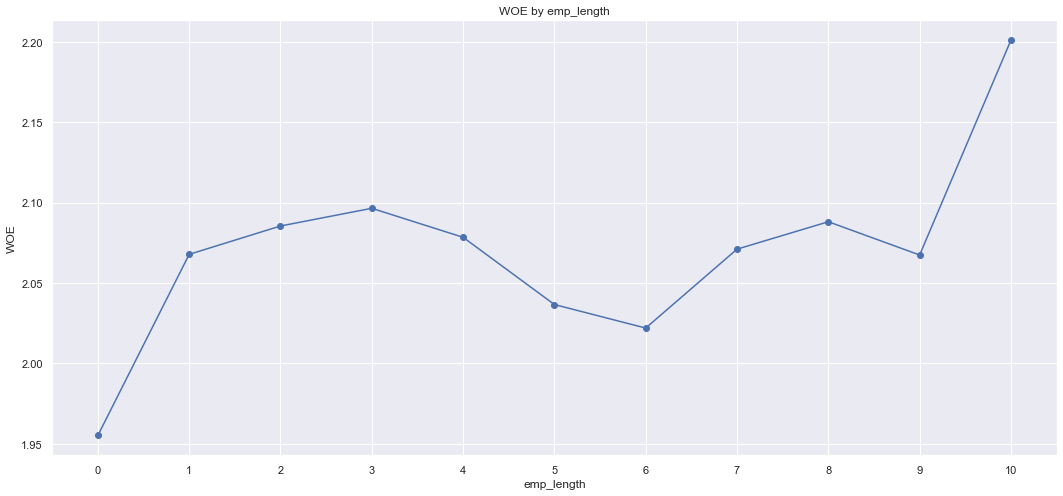

In [51]:
plot_woe_cont(woe_continuous(train_loan_data,'emp_length','good_bad'))

In [52]:
emp_length_df = train_loan_data[['emp_length']]
emp_length_df['emp_length:0'] = np.where(emp_length_df['emp_length']==0,1,0)
emp_length_df['emp_length:1_2_3_4'] = np.where(emp_length_df['emp_length'].isin([1,2,3,4]),1,0)
emp_length_df['emp_length:5_6'] = np.where(emp_length_df['emp_length'].isin([5,6]),1,0)
emp_length_df['emp_length:7_8_9'] = np.where(emp_length_df['emp_length'].isin([7,8,9]),1,0)
emp_length_df['emp_length:10'] = np.where(emp_length_df['emp_length']==10,1,0)
emp_length_df = emp_length_df.drop(['emp_length','emp_length:0'],axis=1)

In [63]:
months_since_issue_d_df = train_loan_data[['months_since_issue_d','good_bad']]
months_since_issue_d_df['months_since_issue_d_fact'] = pd.cut(train_loan_data['months_since_issue_d'],50)

In [54]:
woe_continuous(months_since_issue_d_df,'months_since_issue_d_fact','good_bad')

,months_since_issue_d_fact,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,"(35.91, 37.8]",30269,0.942548,0.057452,28530.0,1739.0,2.797646,64.103563
1,"(37.8, 39.6]",42273,0.928583,0.071417,39254.0,3019.0,2.565128,64.103563
2,"(39.6, 41.4]",41432,0.917431,0.082569,38011.0,3421.0,2.407943,64.103563
3,"(41.4, 43.2]",31074,0.908251,0.091749,28223.0,2851.0,2.292467,64.103563
4,"(43.2, 45.0]",30502,0.901416,0.098584,27495.0,3007.0,2.213061,64.103563
5,"(45.0, 46.8]",13138,0.895951,0.104049,11771.0,1367.0,2.153020,64.103563
6,"(46.8, 48.6]",26241,0.897565,0.102435,23553.0,2688.0,2.170456,64.103563
7,"(48.6, 50.4]",24834,0.887412,0.112588,22038.0,2796.0,2.064578,64.103563
8,"(50.4, 52.2]",22058,0.880950,0.119050,19432.0,2626.0,2.001459,64.103563
9,"(52.2, 54.0]",19541,0.869915,0.130085,16999.0,2542.0,1.900203,64.103563


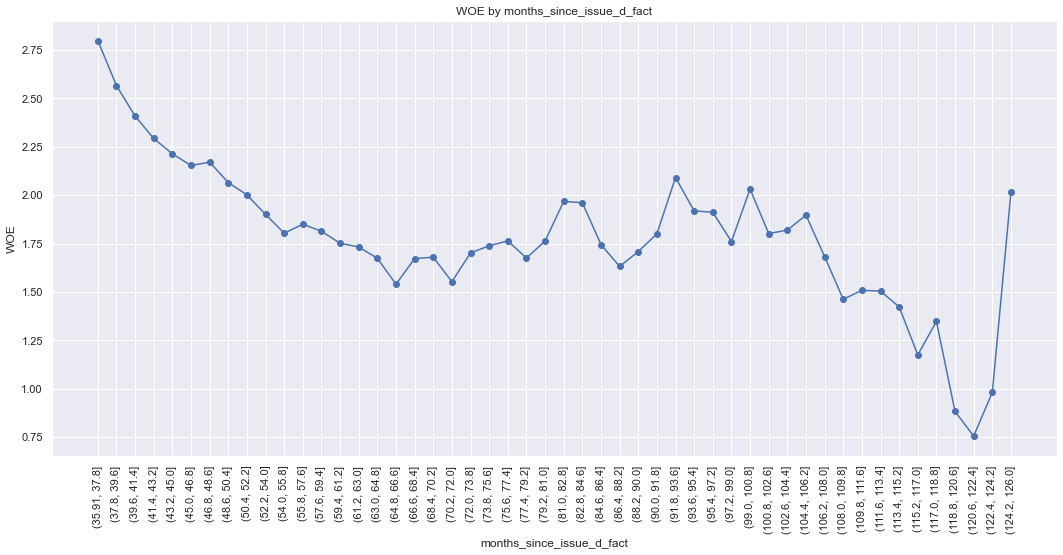

In [55]:
plot_woe_cont(woe_continuous(months_since_issue_d_df,'months_since_issue_d_fact','good_bad'),90)

In [64]:
months_since_issue_d_df['months_since_issue_d:<38'] = np.where(months_since_issue_d_df['months_since_issue_d']<38,1,0)
months_since_issue_d_df['months_since_issue_d:38-40'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([38,39,40]),1,0)
months_since_issue_d_df['months_since_issue_d:41'] = np.where(months_since_issue_d_df['months_since_issue_d']==41,1,0)
months_since_issue_d_df['months_since_issue_d:42-43'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([42,43]),1,0)
months_since_issue_d_df['months_since_issue_d:44-45'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([44,45]),1,0)
months_since_issue_d_df['months_since_issue_d:46-47'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([46,47]),1,0)                                                                 
months_since_issue_d_df['months_since_issue_d:48'] = np.where(months_since_issue_d_df['months_since_issue_d']==48,1,0)
months_since_issue_d_df['months_since_issue_d:49-50'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([49,50]),1,0)                                                                 
months_since_issue_d_df['months_since_issue_d:51-52'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([51,52]),1,0)
months_since_issue_d_df['months_since_issue_d:53-54'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([53,54]),1,0)                                                                 
months_since_issue_d_df['months_since_issue_d:55-60'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([55,56,57,58,59,60]),1,0)                                                                 
months_since_issue_d_df['months_since_issue_d:61-65'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([61,62,63,64,65]),1,0)                                                                 
months_since_issue_d_df['months_since_issue_d:66-72'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([66,67,68,69,70,71,72]),1,0)
months_since_issue_d_df['months_since_issue_d:73-77'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([73,74,75,76,77]),1,0)                                                                 
months_since_issue_d_df['months_since_issue_d:78-84'] = np.where(months_since_issue_d_df['months_since_issue_d'].isin([78,79,80,81,82,83,84]),1,0)
months_since_issue_d_df['months_since_issue_d:>84'] = np.where(months_since_issue_d_df['months_since_issue_d']>84,1,0)                                                                 
                                                                 
months_since_issue_d_df = months_since_issue_d_df.drop(['months_since_issue_d','good_bad','months_since_issue_d_fact','months_since_issue_d:<38'],axis=1)                                                                 
                                                                 

In [93]:
mean_annual_inc = train_loan_data['annual_inc'].mean()

In [95]:
train_loan_data['annual_inc'] = train_loan_data['annual_inc'].fillna(mean_annual_inc)

In [104]:
annual_inc_df = train_loan_data[['annual_inc','good_bad']]
annual_inc_df = annual_inc_df[annual_inc_df['annual_inc']<=150000]

In [107]:
annual_inc_df['annual_inc_fact'] = pd.cut(annual_inc_df['annual_inc'],50)

In [108]:
woe_continuous(annual_inc_df,'annual_inc_fact','good_bad')

,annual_inc_fact,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,"(1747.896, 4858.08]",14,0.785714,0.214286,11.0,3.0,1.299283,85.439393
1,"(4858.08, 7820.16]",47,0.808511,0.191489,38.0,9.0,1.440362,85.439393
2,"(7820.16, 10782.24]",378,0.838624,0.161376,317.0,61.0,1.648028,85.439393
3,"(10782.24, 13744.32]",745,0.828188,0.171812,617.0,128.0,1.572839,85.439393
4,"(13744.32, 16706.4]",1522,0.844941,0.155059,1286.0,236.0,1.695460,85.439393
5,"(16706.4, 19668.48]",2007,0.840060,0.159940,1686.0,321.0,1.658673,85.439393
6,"(19668.48, 22630.56]",3849,0.841517,0.158483,3239.0,610.0,1.669561,85.439393
7,"(22630.56, 25592.64]",6893,0.855796,0.144204,5899.0,994.0,1.780801,85.439393
8,"(25592.64, 28554.72]",6078,0.851925,0.148075,5178.0,900.0,1.749779,85.439393
9,"(28554.72, 31516.8]",11079,0.861720,0.138280,9547.0,1532.0,1.829653,85.439393


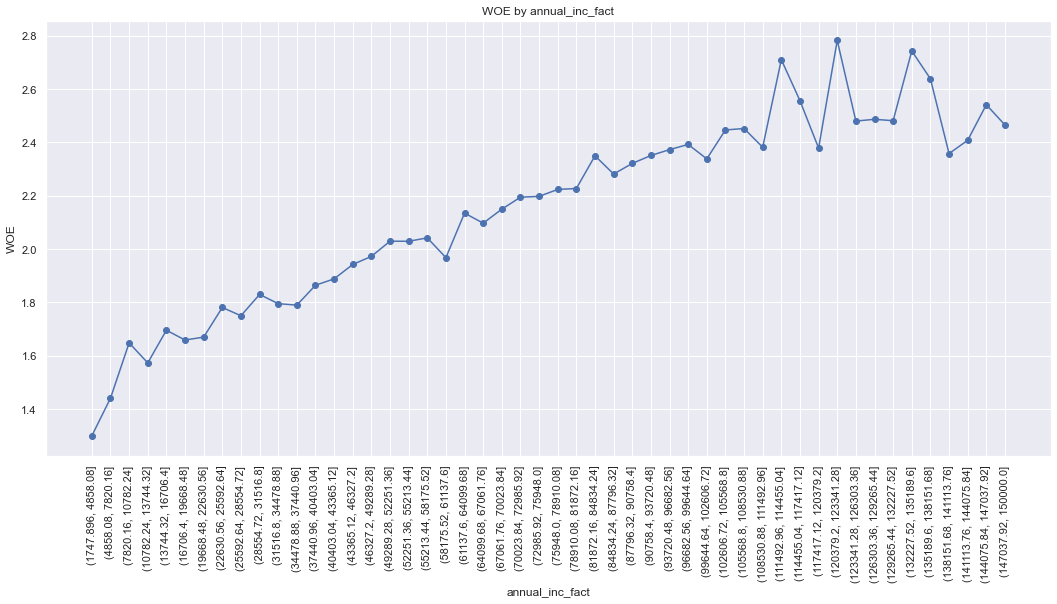

In [109]:
plot_woe_cont(woe_continuous(annual_inc_df,'annual_inc_fact','good_bad'),90)

In [113]:
annual_inc_df['annual_inc:<28'] = np.where(annual_inc_df['annual_inc']<28000,1,0)
annual_inc_df['annual_inc:28-50'] = np.where((annual_inc_df['annual_inc']>=28000) & (annual_inc_df['annual_inc']<50000),1,0)
annual_inc_df['annual_inc:50-60'] = np.where((annual_inc_df['annual_inc']>=50000) & (annual_inc_df['annual_inc']<60000),1,0)
annual_inc_df['annual_inc:60-70'] = np.where((annual_inc_df['annual_inc']>=60000) & (annual_inc_df['annual_inc']<70000),1,0)
annual_inc_df['annual_inc:70-80'] = np.where((annual_inc_df['annual_inc']>=70000) & (annual_inc_df['annual_inc']<80000),1,0)
annual_inc_df['annual_inc:80-90'] = np.where((annual_inc_df['annual_inc']>=80000) & (annual_inc_df['annual_inc']<90000),1,0)
annual_inc_df['annual_inc:90-100'] = np.where((annual_inc_df['annual_inc']>=90000) & (annual_inc_df['annual_inc']<100000),1,0)
annual_inc_df['annual_inc:100-150'] = np.where((annual_inc_df['annual_inc']>=100000) & (annual_inc_df['annual_inc']<150000),1,0)
annual_inc_df['annual_inc:>150'] = np.where(annual_inc_df['annual_inc']>=150000,1,0)

annual_inc_df = annual_inc_df.drop(['annual_inc','good_bad','annual_inc_fact','annual_inc:<28'],axis=1)

In [124]:
woe_continuous(int_rate_df,'int_rate_fact','good_bad')

,int_rate_fact,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,"(5.399, 5.833]",845,0.966864,0.033136,817.0,28.0,3.373435,80.566009
1,"(5.833, 6.246]",9056,0.980234,0.019766,8877.0,179.0,3.903833,80.566009
2,"(6.246, 6.658]",8396,0.970939,0.029061,8152.0,244.0,3.508850,80.566009
3,"(6.658, 7.071]",1951,0.968734,0.031266,1890.0,61.0,3.433458,80.566009
4,"(7.071, 7.484]",3385,0.977253,0.022747,3308.0,77.0,3.760294,80.566009
5,"(7.484, 7.897]",13616,0.963499,0.036501,13119.0,497.0,3.273227,80.566009
6,"(7.897, 8.31]",10386,0.949933,0.050067,9866.0,520.0,2.943021,80.566009
7,"(8.31, 8.722]",7049,0.964960,0.035040,6802.0,247.0,3.315584,80.566009
8,"(8.722, 9.135]",10248,0.939208,0.060792,9625.0,623.0,2.737573,80.566009
9,"(9.135, 9.548]",7043,0.966350,0.033650,6806.0,237.0,3.357500,80.566009


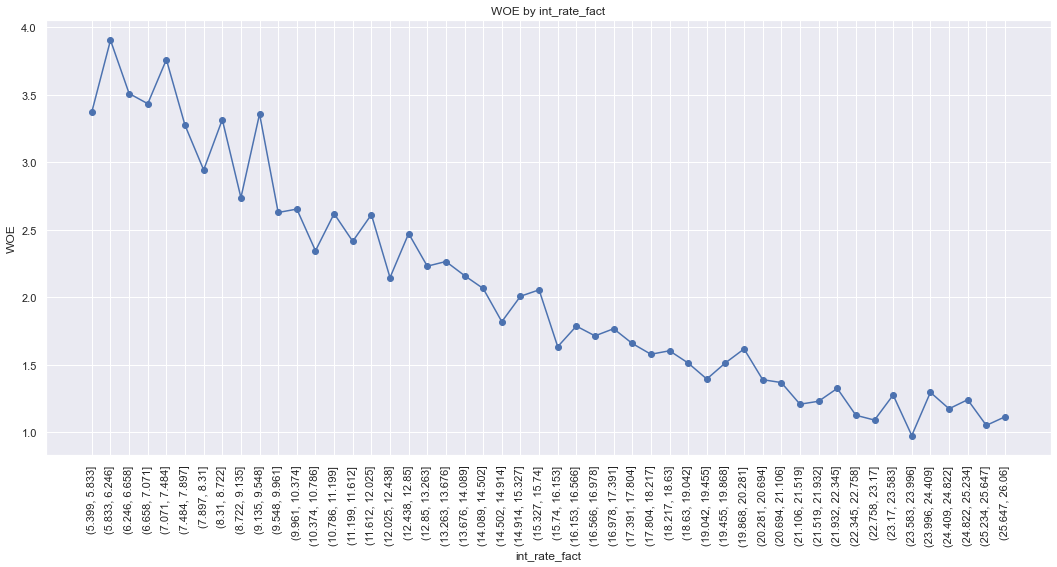

In [126]:
plot_woe_cont(woe_continuous(int_rate_df,'int_rate_fact','good_bad'),90)

In [128]:
int_rate_df = train_loan_data[['int_rate','good_bad']]
int_rate_df['int_rate_fact'] = pd.cut(int_rate_df['int_rate'],50)

int_rate_df['int_rate:<7'] = np.where(int_rate_df['int_rate']<7,1,0)
int_rate_df['int_rate:7-9'] = np.where((int_rate_df['int_rate']>=7) & (int_rate_df['int_rate']<9),1,0)
int_rate_df['int_rate:9-10.3'] = np.where((int_rate_df['int_rate']>=9) & (int_rate_df['int_rate']<10.3),1,0)
int_rate_df['int_rate:10.3-12'] = np.where((int_rate_df['int_rate']>=10.3) & (int_rate_df['int_rate']<12),1,0)
int_rate_df['int_rate:12-14'] = np.where((int_rate_df['int_rate']>=12) & (int_rate_df['int_rate']<14),1,0)
int_rate_df['int_rate:14-16'] = np.where((int_rate_df['int_rate']>=14) & (int_rate_df['int_rate']<16),1,0)
int_rate_df['int_rate:16-19'] = np.where((int_rate_df['int_rate']>=16) & (int_rate_df['int_rate']<19),1,0)
int_rate_df['int_rate:19-23'] = np.where((int_rate_df['int_rate']>=19) & (int_rate_df['int_rate']<23),1,0)
int_rate_df['int_rate:>=23'] = np.where(int_rate_df['int_rate']>=23,1,0)

int_rate_df = int_rate_df.drop(['int_rate','good_bad','int_rate_fact','int_rate:<7'],axis=1)

In [131]:
woe_continuous(dti_df,'dti_fact','good_bad')

,dti_fact,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,"(-0.04, 0.8]",1637,0.891265,0.108735,1459.0,178.0,2.103723,81.305042
1,"(0.8, 1.6]",2093,0.892021,0.107979,1867.0,226.0,2.111553,81.305042
2,"(1.6, 2.399]",2697,0.910641,0.089359,2456.0,241.0,2.321492,81.305042
3,"(2.399, 3.199]",3431,0.911105,0.088895,3126.0,305.0,2.327198,81.305042
4,"(3.199, 3.999]",4460,0.908969,0.091031,4054.0,406.0,2.301106,81.305042
5,"(3.999, 4.799]",5395,0.917887,0.082113,4952.0,443.0,2.413977,81.305042
6,"(4.799, 5.599]",6393,0.912248,0.087752,5832.0,561.0,2.341394,81.305042
7,"(5.599, 6.398]",7325,0.913720,0.086280,6693.0,632.0,2.359928,81.305042
8,"(6.398, 7.198]",8327,0.914015,0.085985,7611.0,716.0,2.363670,81.305042
9,"(7.198, 7.998]",9419,0.913791,0.086209,8607.0,812.0,2.360831,81.305042


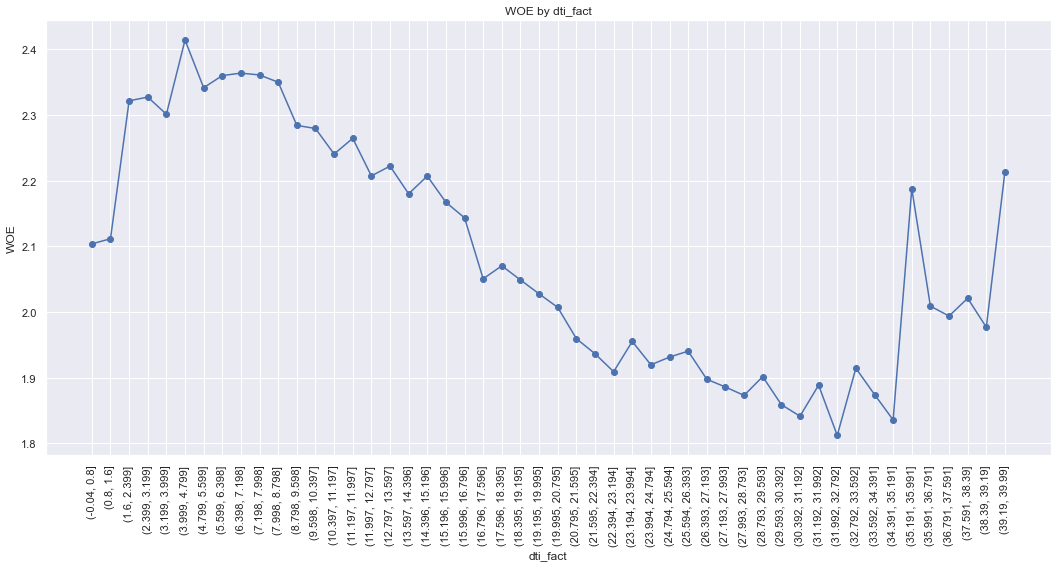

In [133]:
plot_woe_cont(woe_continuous(dti_df,'dti_fact','good_bad'),90)

In [134]:
dti_df = train_loan_data[['dti','good_bad']]
dti_df['dti_fact'] = pd.cut(dti_df['dti'],50)
dti_df['dti:<1.6'] = np.where(dti_df['dti']<1.6,1,0)
dti_df['dti:1.6-4'] = np.where((dti_df['dti']>=1.6) & (dti_df['dti']<4),1,0)
dti_df['dti:4-4.8'] = np.where((dti_df['dti']>=4) & (dti_df['dti']<4.8),1,0)
dti_df['dti:4.8-8.8'] = np.where((dti_df['dti']>=4.8) & (dti_df['dti']<8.8),1,0)
dti_df['dti:8.8-13.6'] = np.where((dti_df['dti']>=8.8) & (dti_df['dti']<13.6),1,0)
dti_df['dti:13.6-16.8'] = np.where((dti_df['dti']>=13.6) & (dti_df['dti']<16.8),1,0)
dti_df['dti:16.8-20.8'] = np.where((dti_df['dti']>=16.8) & (dti_df['dti']<20.8),1,0)
dti_df['dti:20.8-26.4'] = np.where((dti_df['dti']>=20.8) & (dti_df['dti']<26.4),1,0)
dti_df['dti:26.4-34'] = np.where((dti_df['dti']>=26.4) & (dti_df['dti']<34),1,0)
dti_df['dti:>34'] = np.where(dti_df['dti']>=34,1,0)

dti_df = dti_df.drop(['dti','dti_fact','good_bad','dti:>34'],axis=1)

In [136]:
train_loan_data['delinq_2yrs'].isna().sum()

19

In [137]:
train_loan_data['delinq_2yrs'].describe()

count    399981.000000
mean          0.284426
std           0.797844
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [139]:
np.percentile(train_loan_data['delinq_2yrs'][~train_loan_data['delinq_2yrs'].isna()],range(90,101))

array([ 1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  4., 29.])

In [140]:
train_loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
     

In [150]:
from sklearn.impute import KNNImputer

In [176]:
delinq_2yrs_df = train_loan_data[['delinq_2yrs','good_bad']]
delinq_2yrs_df['delinq_2yrs'] = delinq_2yrs_df['delinq_2yrs'].fillna(0)

In [177]:
delinq_2yrs_df['delinq_2yrs'] = round(delinq_2yrs_df['delinq_2yrs'],0)
delinq_2yrs_df['delinq_2yrs_fact'] = pd.cut(delinq_2yrs_df['delinq_2yrs'],50)

In [178]:
woe_continuous(delinq_2yrs_df,'delinq_2yrs_fact','good_bad')

,delinq_2yrs_fact,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,"(-0.029, 0.58]",328606,0.890465,0.109535,292612.0,35994.0,2.095495,inf
1,"(0.58, 1.16]",48202,0.891498,0.108502,42972.0,5230.0,2.106137,inf
2,"(1.16, 1.74]",0,NaN,NaN,NaN,NaN,NaN,inf
3,"(1.74, 2.32]",13959,0.887599,0.112401,12390.0,1569.0,2.066451,inf
4,"(2.32, 2.9]",0,NaN,NaN,NaN,NaN,NaN,inf
5,"(2.9, 3.48]",4869,0.886014,0.113986,4314.0,555.0,2.050653,inf
6,"(3.48, 4.06]",2050,0.898049,0.101951,1841.0,209.0,2.175730,inf
7,"(4.06, 4.64]",0,NaN,NaN,NaN,NaN,NaN,inf
8,"(4.64, 5.22]",1067,0.886598,0.113402,946.0,121.0,2.056452,inf
9,"(5.22, 5.8]",0,NaN,NaN,NaN,NaN,NaN,inf


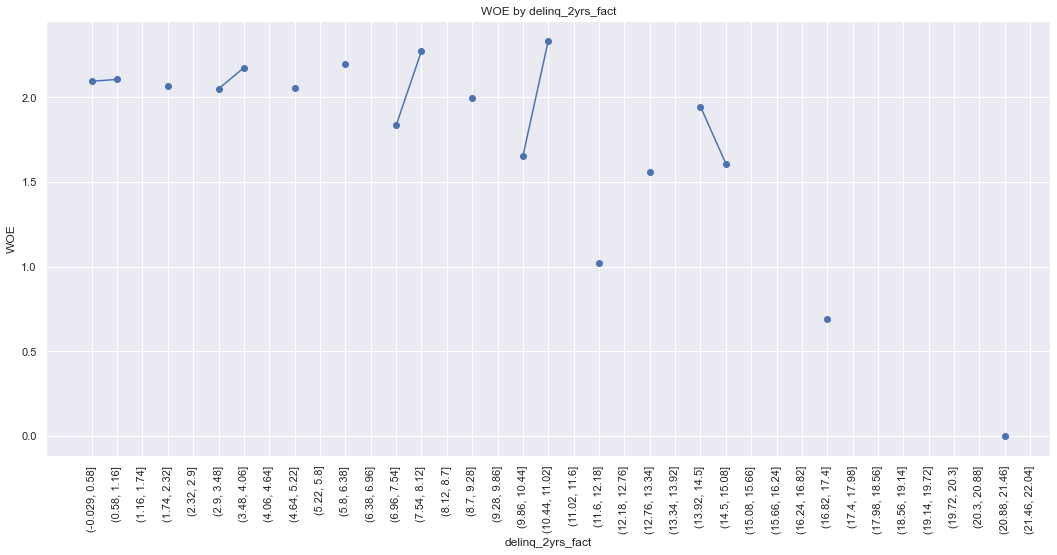

In [179]:
plot_woe_cont(woe_continuous(delinq_2yrs_df,'delinq_2yrs_fact','good_bad'),90)

In [180]:
delinq_2yrs_df['delinq_2yrs:<=1'] = np.where(delinq_2yrs_df['delinq_2yrs']<=1,1,0)
delinq_2yrs_df['delinq_2yrs:2'] = np.where(delinq_2yrs_df['delinq_2yrs']==2,1,0)
delinq_2yrs_df['delinq_2yrs:3'] = np.where(delinq_2yrs_df['delinq_2yrs']==3,1,0)
delinq_2yrs_df['delinq_2yrs:4'] = np.where(delinq_2yrs_df['delinq_2yrs']==4,1,0)
delinq_2yrs_df['delinq_2yrs:>4'] = np.where(delinq_2yrs_df['delinq_2yrs']>1,1,0)

delinq_2yrs_df = delinq_2yrs_df.drop(['good_bad','delinq_2yrs','delinq_2yrs_fact','delinq_2yrs:>4'],axis=1)

In [187]:
train_loan_data.loc[train_loan_data['months_since_ear_cr_line']<0,'months_since_ear_cr_line'] = train_loan_data['months_since_ear_cr_line'].max()

In [189]:
train_loan_data['months_since_ear_cr_line'] = train_loan_data['months_since_ear_cr_line'].fillna(train_loan_data['months_since_ear_cr_line'].mean())

In [202]:
months_since_ear_cr_line_df = train_loan_data[['months_since_ear_cr_line','good_bad']]
months_since_ear_cr_line_df['months_since_ear_cr_line_fact'] = pd.cut(months_since_ear_cr_line_df['months_since_ear_cr_line'],50)

In [193]:
woe_continuous(months_since_ear_cr_line_df,'months_since_ear_cr_line_fact','good_bad')

,months_since_ear_cr_line_fact,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,"(72.486, 83.28]",923,0.906826,0.093174,837.0,86.0,2.275477,87.032798
1,"(83.28, 93.56]",1957,0.886050,0.113950,1734.0,223.0,2.051014,87.032798
2,"(93.56, 103.84]",2540,0.855512,0.144488,2173.0,367.0,1.778502,87.032798
3,"(103.84, 114.12]",4248,0.870527,0.129473,3698.0,550.0,1.905629,87.032798
4,"(114.12, 124.4]",7176,0.866778,0.133222,6220.0,956.0,1.872767,87.032798
5,"(124.4, 134.68]",9543,0.859164,0.140836,8199.0,1344.0,1.808362,87.032798
6,"(134.68, 144.96]",11511,0.870993,0.129007,10026.0,1485.0,1.909767,87.032798
7,"(144.96, 155.24]",13608,0.877352,0.122648,11939.0,1669.0,1.967586,87.032798
8,"(155.24, 165.52]",15460,0.880466,0.119534,13612.0,1848.0,1.996848,87.032798
9,"(165.52, 175.8]",17752,0.884971,0.115029,15710.0,2042.0,2.040368,87.032798


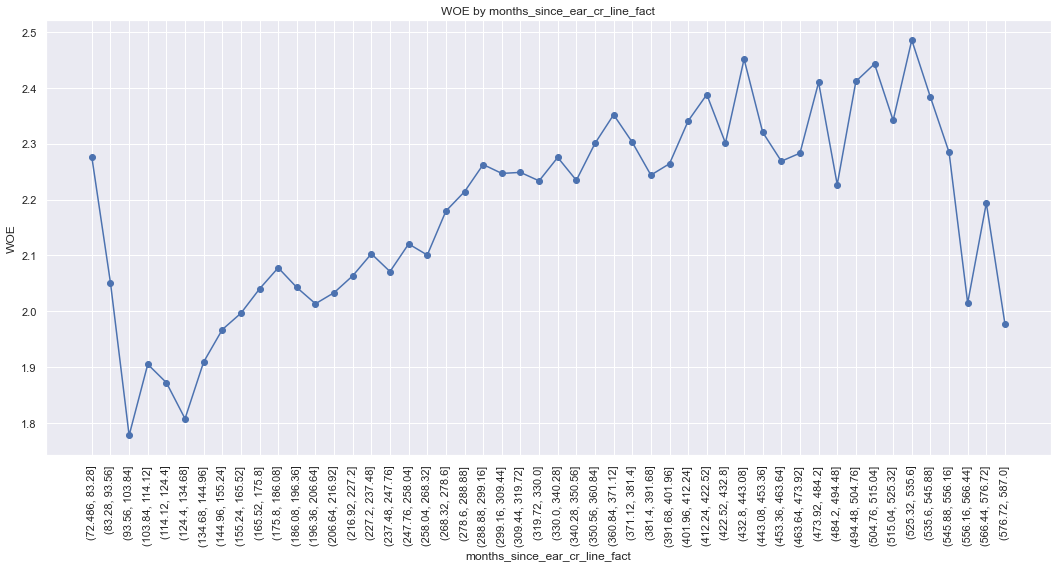

In [195]:
plot_woe_cont(woe_continuous(months_since_ear_cr_line_df,'months_since_ear_cr_line_fact','good_bad'),90)

In [203]:
months_since_ear_cr_line_df['months_since_ear_cr_line:<134'] = np.where(months_since_ear_cr_line_df['months_since_ear_cr_line']<134,1,0)
months_since_ear_cr_line_df['months_since_ear_cr_line:134-186'] = np.where((months_since_ear_cr_line_df['months_since_ear_cr_line']>=134) & (months_since_ear_cr_line_df['months_since_ear_cr_line']<186),1,0)
months_since_ear_cr_line_df['months_since_ear_cr_line:186-268'] = np.where((months_since_ear_cr_line_df['months_since_ear_cr_line']>=186) & (months_since_ear_cr_line_df['months_since_ear_cr_line']<268),1,0)
months_since_ear_cr_line_df['months_since_ear_cr_line:268-350'] = np.where((months_since_ear_cr_line_df['months_since_ear_cr_line']>=268) & (months_since_ear_cr_line_df['months_since_ear_cr_line']<350),1,0)
months_since_ear_cr_line_df['months_since_ear_cr_line:350-450'] = np.where((months_since_ear_cr_line_df['months_since_ear_cr_line']>=350) & (months_since_ear_cr_line_df['months_since_ear_cr_line']<450),1,0)
months_since_ear_cr_line_df['months_since_ear_cr_line:450-535'] = np.where((months_since_ear_cr_line_df['months_since_ear_cr_line']>=450) & (months_since_ear_cr_line_df['months_since_ear_cr_line']<535),1,0)
months_since_ear_cr_line_df['months_since_ear_cr_line:>535'] = np.where(months_since_ear_cr_line_df['months_since_ear_cr_line']>=535,1,0)

months_since_ear_cr_line_df = months_since_ear_cr_line_df.drop(['months_since_ear_cr_line:>535',
                                                                'good_bad','months_since_ear_cr_line',
                                                                'months_since_ear_cr_line_fact'],axis=1)




In [205]:
train_loan_data_cont = pd.concat([emp_length_df,months_since_issue_d_df,annual_inc_df,int_rate_df,dti_df,delinq_2yrs_df,months_since_ear_cr_line_df],axis=1)
print(train_loan_data_cont.shape)
train_loan_data_cont.head()

(400000, 54)


,emp_length:1_2_3_4,emp_length:5_6,emp_length:7_8_9,emp_length:10,months_since_issue_d:38-40,months_since_issue_d:41,months_since_issue_d:42-43,months_since_issue_d:44-45,months_since_issue_d:46-47,months_since_issue_d:48,months_since_issue_d:49-50,months_since_issue_d:51-52,months_since_issue_d:53-54,months_since_issue_d:55-60,months_since_issue_d:61-65,months_since_issue_d:66-72,months_since_issue_d:73-77,months_since_issue_d:78-84,months_since_issue_d:>84,annual_inc:28-50,annual_inc:50-60,annual_inc:60-70,annual_inc:70-80,annual_inc:80-90,annual_inc:90-100,annual_inc:100-150,annual_inc:>150,int_rate:7-9,int_rate:9-10.3,int_rate:10.3-12,int_rate:12-14,int_rate:14-16,int_rate:16-19,int_rate:19-23,int_rate:>=23,dti:<1.6,dti:1.6-4,dti:4-4.8,dti:4.8-8.8,dti:8.8-13.6,dti:13.6-16.8,dti:16.8-20.8,dti:20.8-26.4,dti:26.4-34,delinq_2yrs:<=1,delinq_2yrs:2,delinq_2yrs:3,delinq_2yrs:4,months_since_ear_cr_line:<134,months_since_ear_cr_line:134-186,months_since_ear_cr_line:186-268,months_since_ear_cr_line:268-350,months_since_ear_cr_line:350-450,months_since_ear_cr_line:450-535
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [206]:
final_training_data = pd.concat([train_loan_data_discrete,train_loan_data_cont,train_loan_data[['good_bad']]],axis=1)

In [207]:
final_training_data.shape

(400000, 82)

In [208]:
final_training_data.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,term:36,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:KS_MS_NH_VT_WV_DC_WY_ME,addr_state:FL,addr_state:AL_HI_LA_NM,addr_state:NY,addr_state:NC_MD_OK,addr_state:CA,addr_state:VA_NJ_MO_TN_UT_AZ_AR_DE_RI_KY_MI,addr_state:OH_PA_MA_MN_IN_GA_WI_SD_WA_OR_MT,addr_state:TX,addr_state:IL_SC_CT_AK_CO_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:renewable_energy_moving_house_other_medical,purpose:wedding_vacation,purpose:debt_consolidation,purpose:home_improvement_major_purchase_car,purpose:credit_card,initial_list_status:w,emp_length:1_2_3_4,emp_length:5_6,emp_length:7_8_9,emp_length:10,months_since_issue_d:38-40,months_since_issue_d:41,months_since_issue_d:42-43,months_since_issue_d:44-45,months_since_issue_d:46-47,months_since_issue_d:48,months_since_issue_d:49-50,months_since_issue_d:51-52,months_since_issue_d:53-54,months_since_issue_d:55-60,months_since_issue_d:61-65,months_since_issue_d:66-72,months_since_issue_d:73-77,months_since_issue_d:78-84,months_since_issue_d:>84,annual_inc:28-50,annual_inc:50-60,annual_inc:60-70,annual_inc:70-80,annual_inc:80-90,annual_inc:90-100,annual_inc:100-150,annual_inc:>150,int_rate:7-9,int_rate:9-10.3,int_rate:10.3-12,int_rate:12-14,int_rate:14-16,int_rate:16-19,int_rate:19-23,int_rate:>=23,dti:<1.6,dti:1.6-4,dti:4-4.8,dti:4.8-8.8,dti:8.8-13.6,dti:13.6-16.8,dti:16.8-20.8,dti:20.8-26.4,dti:26.4-34,delinq_2yrs:<=1,delinq_2yrs:2,delinq_2yrs:3,delinq_2yrs:4,months_since_ear_cr_line:<134,months_since_ear_cr_line:134-186,months_since_ear_cr_line:186-268,months_since_ear_cr_line:268-350,months_since_ear_cr_line:350-450,months_since_ear_cr_line:450-535,good_bad
0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
